# Preprocessing Spain's Energy Data for Time Series Modeling

## Prepare Notebook

**Read in libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings

C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Set Notebook Preferences**

In [28]:
#Set Pandas preferenes
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

#Set style for matplotlib and fontdict for plots
plt.style.use('seaborn-dark')
title_dict= {'fontsize':18,
            'style': 'italic',
            'fontweight': 'semibold'}

label_dict= {'fontsize':14,
             'fontweight': 'semibold'}

#Surpress annoying warnings
warnings.filterwarnings('ignore')

#Set path to save visualizations created in this notebook
viz_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\02_Data_Processing'

#Set path to read in visuals from EDA
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\01_Exploratory_Data_Analysis'

**Read in data**

In [3]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Data\02_Cleaned_Data'

#Read in file
df = pd.read_csv(path + '/2020_0620_Weather_Energy.csv', index_col=0)

**Preview Data**

In [4]:
print('Data shape:',df.shape)
display(df.head())

Data shape: (35070, 17)


,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,price actual,temp,total load actual
date_time,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,65.41,30.814633,25385.0
2015-01-01 01:00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,64.92,30.852860,24382.0
2015-01-01 02:00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,64.48,30.108448,22734.0
2015-01-01 03:00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,59.32,30.091044,21286.0
2015-01-01 04:00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,56.04,30.192620,20264.0


## Correlation Matrix

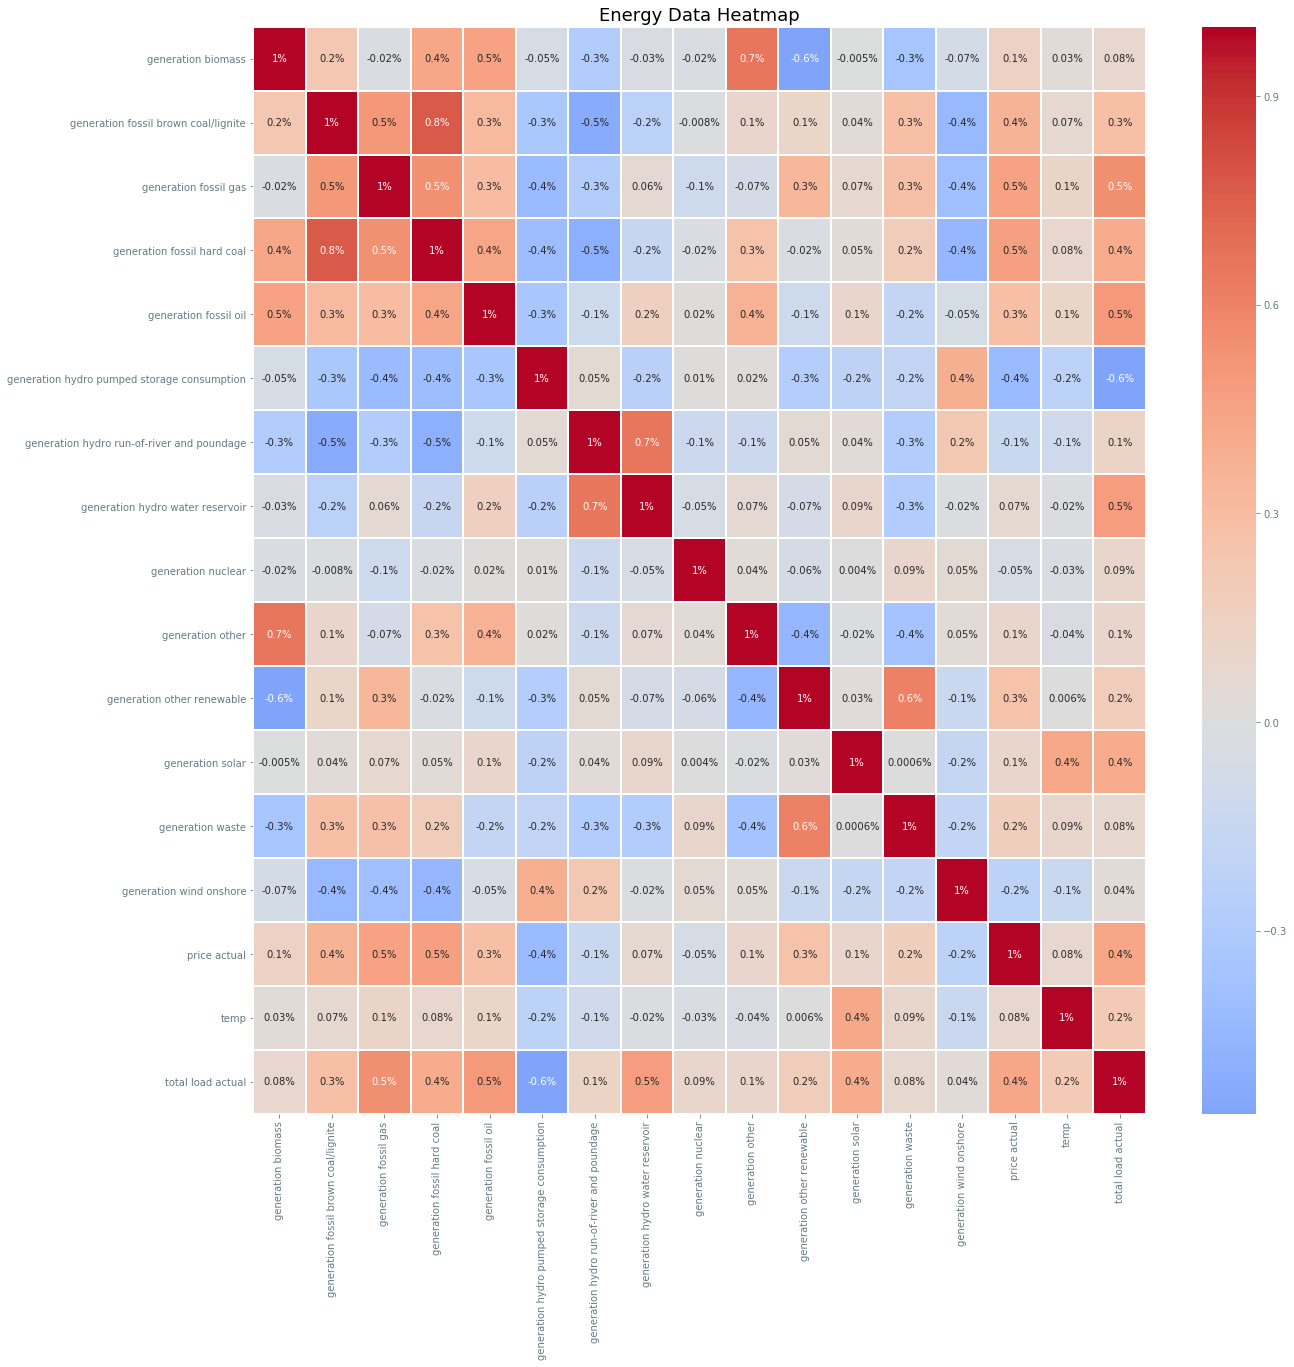

In [5]:
Image(filename= eda_path + '/Correlation_Matrix.png', height=1300, width=1300)

**Dropping cols with <.4 and >-.4 correlation with target**

In [6]:
#Create corr
corr = df.corr()

#Capture features with a strong corr w/ target
features = corr['price actual'][(corr['price actual'] < -.4 )| (corr['price actual'] > .4 )].index
df = df[features]

#Check
df.head()

,generation fossil gas,generation fossil hard coal,generation hydro pumped storage consumption,price actual,total load actual
date_time,,,,,
2015-01-01 00:00:00,4844.0,4821.0,863.0,65.41,25385.0
2015-01-01 01:00:00,5196.0,4755.0,920.0,64.92,24382.0
2015-01-01 02:00:00,4857.0,4581.0,1164.0,64.48,22734.0
2015-01-01 03:00:00,4314.0,4131.0,1503.0,59.32,21286.0
2015-01-01 04:00:00,4130.0,3840.0,1826.0,56.04,20264.0


## Data Preparation for Univariate Analysis

**Target Investigation**

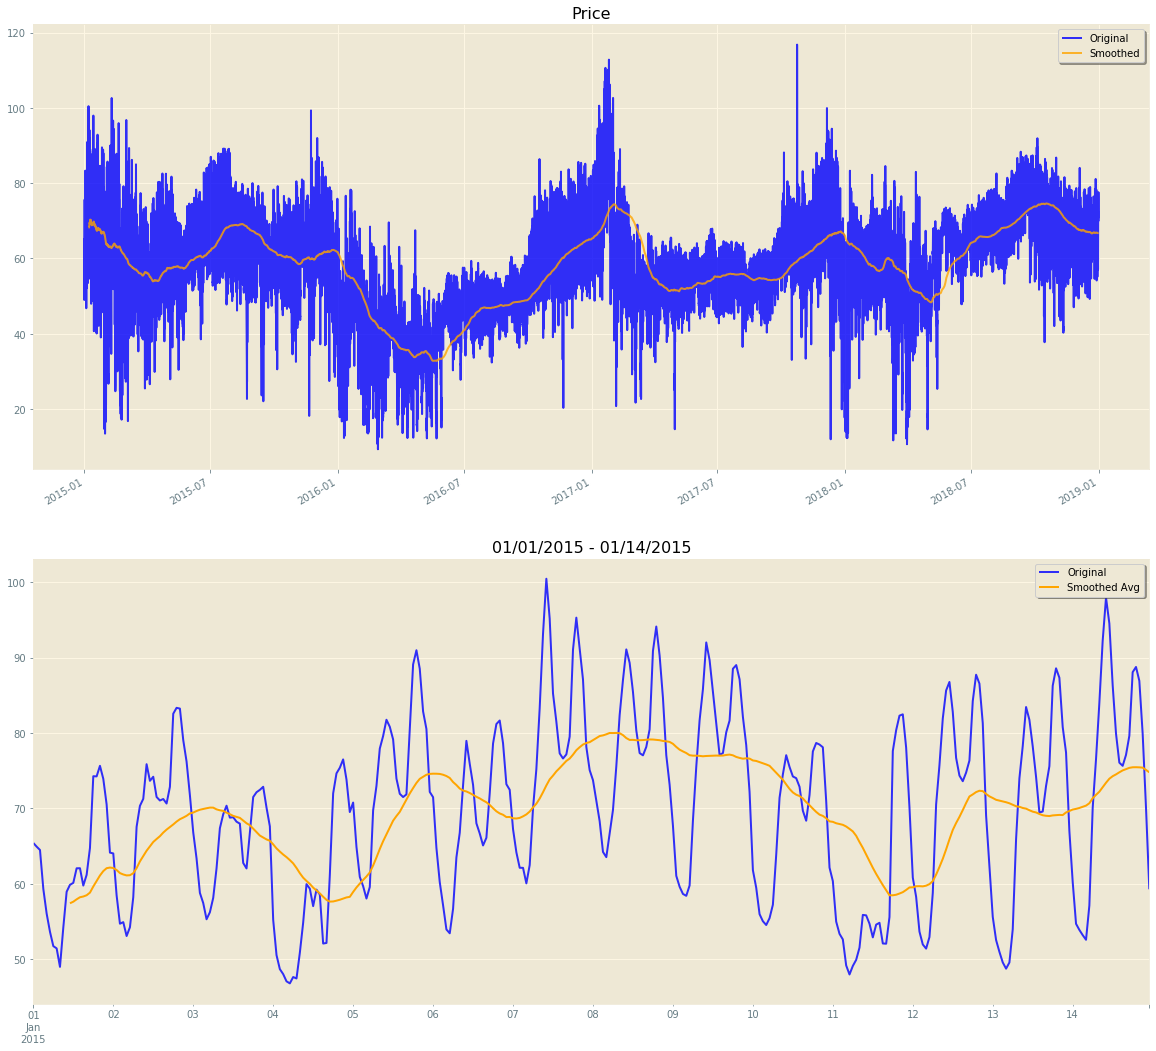

In [7]:
Image(filename= eda_path + '/Target_Plot.png', height=1300, width=1500)

**Target Decomposition Plots**

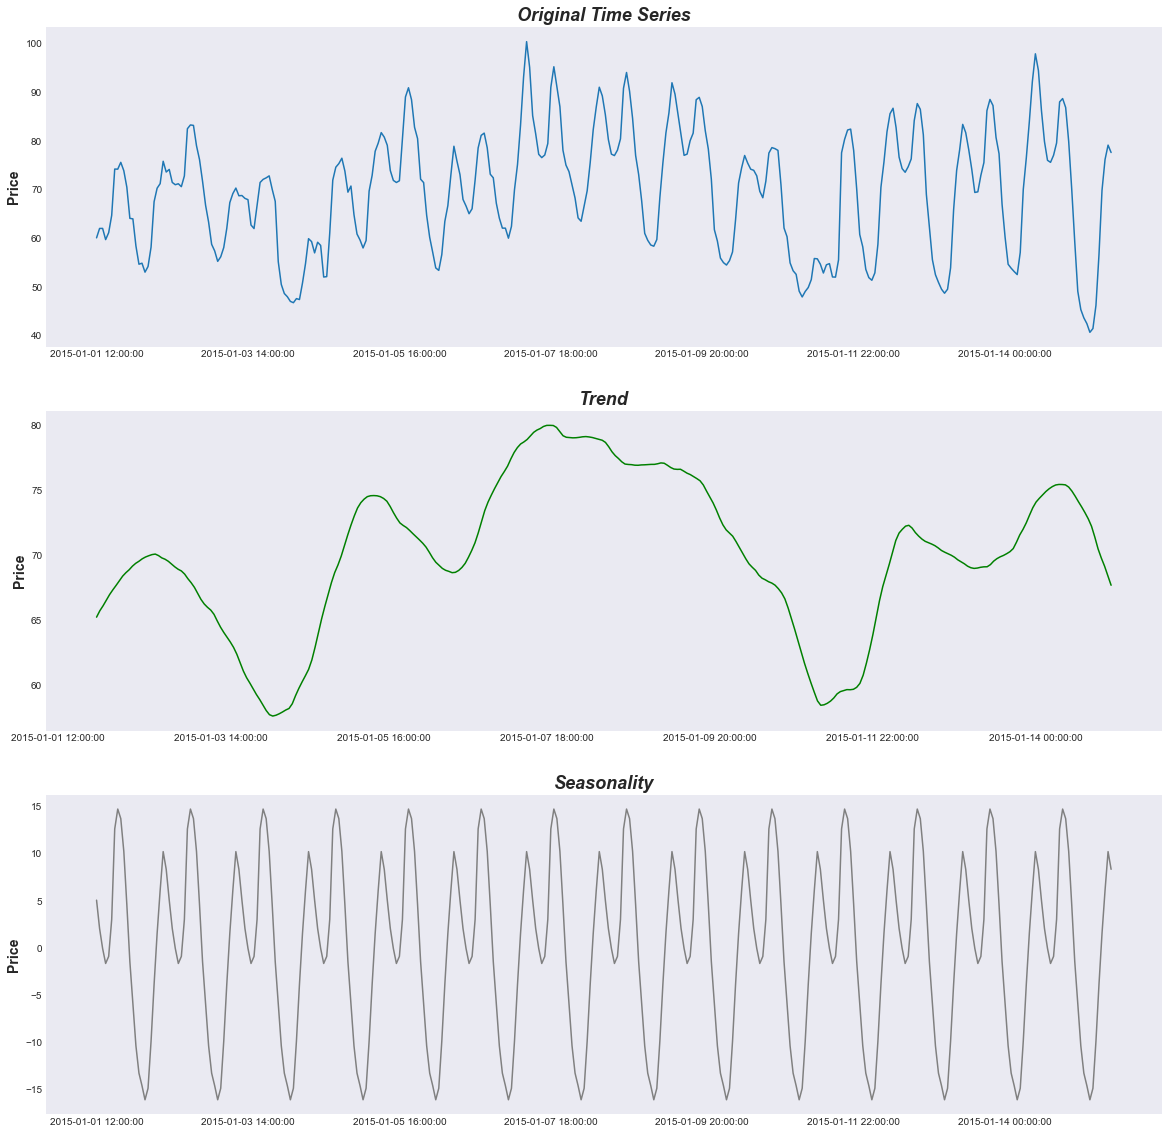

In [29]:
#Read in libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from TimeseriesPlotter import timeseries_plot

#Fit seasonal_decompose to first 2 weeks of data to see what's happening
result = seasonal_decompose(df['price actual'][:24 * 14], model = 'add', freq=24)

#Create plot
f, ax  = plt.subplots(3,1,figsize=(20,20))

#PLot Components of results
timeseries_plot(result.observed,title = 'Original Time Series',
                title_dict=title_dict, label_dict=label_dict,ax=ax[0], xlabel='',ylabel = 'Price')
timeseries_plot(result.trend,title = 'Trend',
                title_dict=title_dict,label_dict=label_dict, ax=ax[1], xlabel='',ylabel = 'Price', color = 'green')
timeseries_plot(result.seasonal,title = 'Seasonality',
                title_dict=title_dict,label_dict=label_dict, ax=ax[2], xlabel='',ylabel = 'Price', color = 'grey');

#Export plot
plt.savefig(viz_path + '/target_decomposition.png',bbox_inches='tight')

**Stationarize Target**

In [9]:
#Refit seasonal_decompose to entire df
result = seasonal_decompose(df['price actual'], model = 'add', freq=24)

#Store trend and seasonal component to df
df['price_actual_season'] = result.seasonal
df['price_actual_trend'] = result.trend

#Drop na
df.dropna(inplace = True, axis = 0)

In [10]:
#Make target stationary
df['price_actual_stationary'] = df['price actual'] - df['price_actual_season'] - df['price_actual_trend']

**Check for Stationarity**

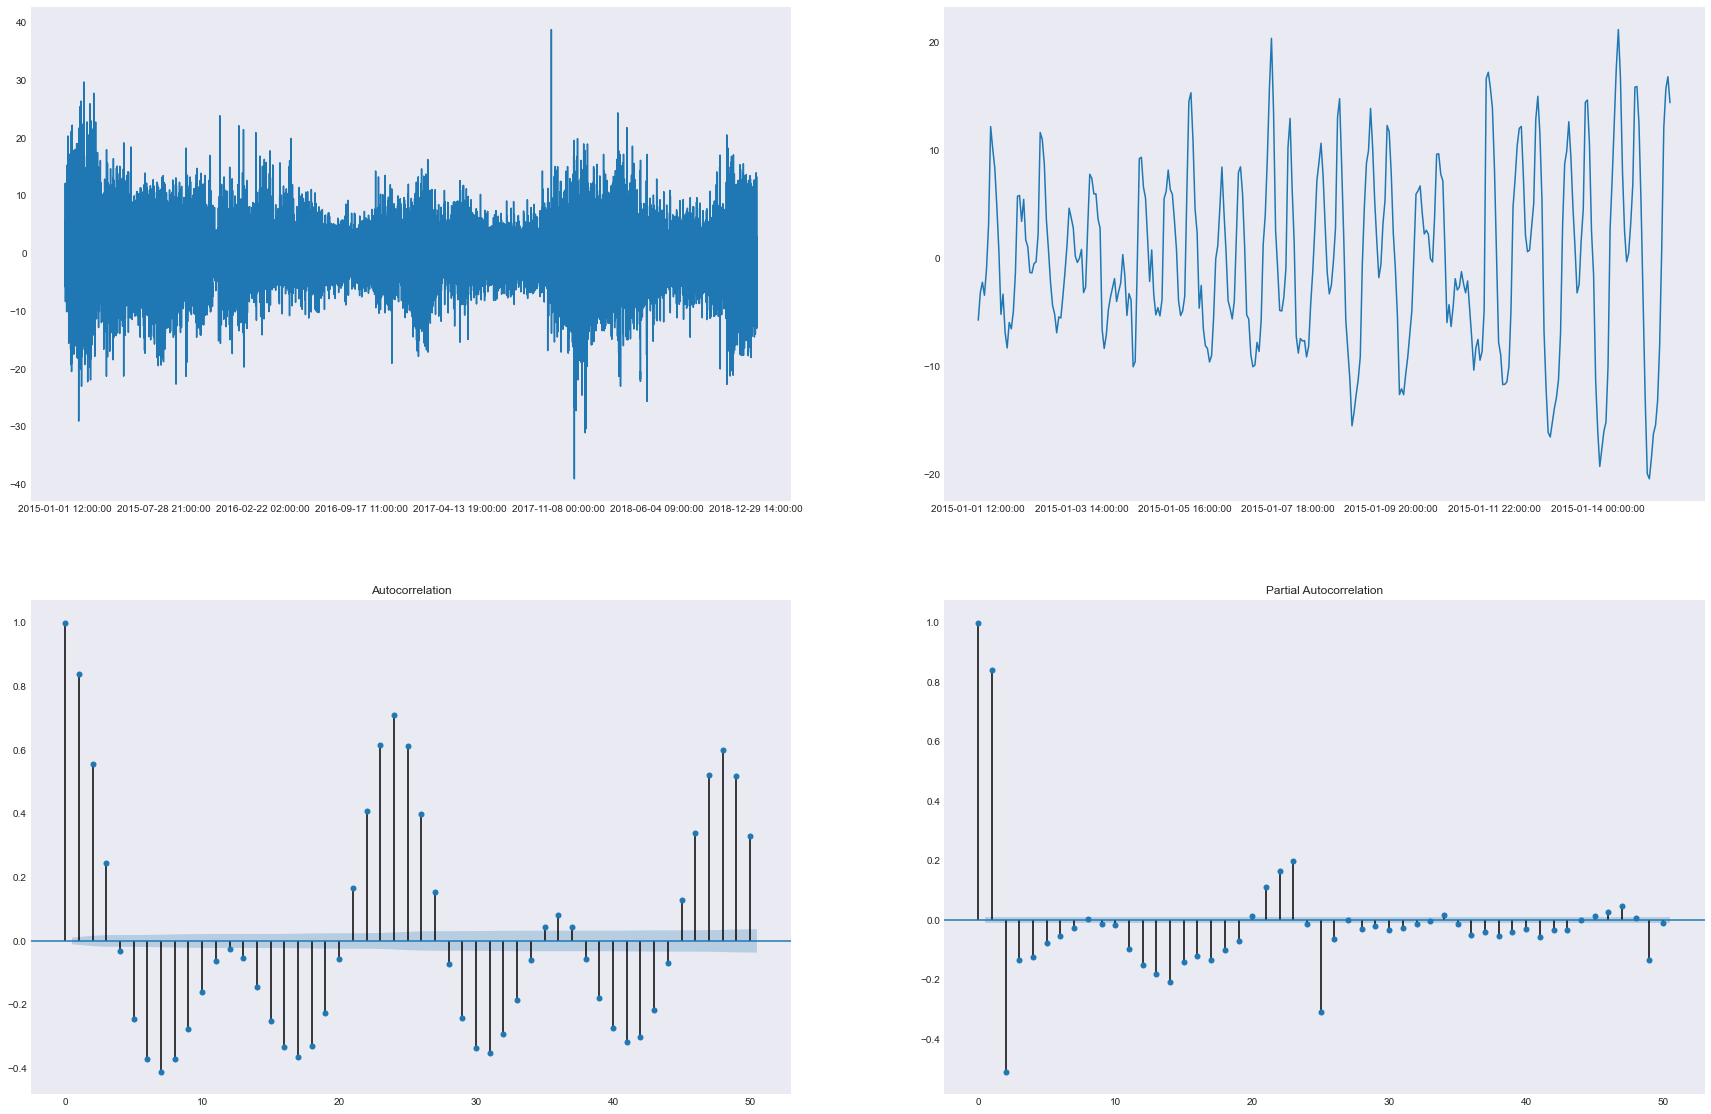

In [30]:
#Read in libraries
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#Create plot
f, ax  = plt.subplots(2,2,figsize=(30,20))

#Plot Raw stattionary data and Stationary Data with zoom
timeseries_plot(df['price_actual_stationary'], ax = ax[0,0])
timeseries_plot(df['price_actual_stationary'][:24*14], ax = ax[0,1])

#Plot PACF and ACF
plot_acf(df['price_actual_stationary'], ax = ax[1,0], lags = 50)
plot_pacf(df['price_actual_stationary'], ax = ax[1,1], lags = 50);

#Export plot
plt.savefig(viz_path + '/stationary_target_PACF_ACF.png',bbox_inches='tight')

## Data Preparation for Mulitvariate Analysis

**Granger's Test of Causality**

**Cointegration Test**

**Make Data Stationary**

**Test for Stationarity**

**ADF and KPSS Test**

In [12]:
# #Read in ADF and KPSS tests
# from Time_Series_Tests import ADF_KPSS_test

# #Apply tests to each timeseries in data 
# for col in df.columns:
#     print('Results for {}\n'.format(str.title(col)))
#     ADF_KPSS_test(df[col],0)

**Check Autocorrelation and Partial Autocorrelation**

**Split data into training and test sets**

In [13]:
#Set cutoff to split data 85% train and 15% test
cutoff = round(len(df) *.85)

#Split data
X_train = df[:cutoff]
X_test = df[cutoff:]

#Check
print('Training data shape{} Test data shape: {}'.format(X_train.shape,X_test.shape))

Training data shape(29789, 8) Test data shape: (5257, 8)


**Prepare data for XGBoost**

In [14]:
#Create boosting df for univariate analysis
xg_df = pd.DataFrame(df['price actual'], )

xg_df.reset_index(inplace = True)
xg_df[['date','time']] = xg_df.date_time.str.split(' ', expand = True)

###Extract features from date###
xg_df.date =pd.to_datetime(xg_df.date)
xg_df['year']=xg_df.date.dt.year
xg_df['month']=xg_df.date.dt.month_name()
xg_df['week_number_year']=xg_df.date.dt.week
xg_df['weekday']=xg_df.date.dt.day_name()
xg_df['day']=xg_df.date.dt.day
xg_df['is_weekend']= xg_df['weekday'].apply(lambda x: True if (x == 'Saturday')|( x=='Sunday') else False)

#Check for holidays
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

#Init calendar
cal = calendar()
holidays = cal.holidays(start = xg_df['date'].min(), end=xg_df['date'].max())

#Add holiday flair
xg_df['holiday'] = xg_df['date'].isin(holidays)


###Add Window statistics###


#Sort xg_df and check
xg_df = xg_df.reindex(sorted(xg_df.columns), axis=1)
display(xg_df.head())

,date,date_time,day,holiday,is_weekend,month,price actual,time,week_number_year,weekday,year
0,2015-01-01,2015-01-01 12:00:00,1,True,False,January,60.12,12:00:00,1,Thursday,2015
1,2015-01-01,2015-01-01 13:00:00,1,True,False,January,62.05,13:00:00,1,Thursday,2015
2,2015-01-01,2015-01-01 14:00:00,1,True,False,January,62.06,14:00:00,1,Thursday,2015
3,2015-01-01,2015-01-01 15:00:00,1,True,False,January,59.76,15:00:00,1,Thursday,2015
4,2015-01-01,2015-01-01 16:00:00,1,True,False,January,61.18,16:00:00,1,Thursday,2015


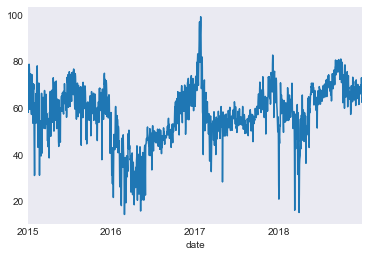

In [15]:
xg_df.groupby('date')['price actual'].mean().plot()

In [16]:
len(xg_df.groupby('date')['price actual'].mean())

1461

# Export Data

In [17]:
#Set path location to write file
path = r'\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Data\03_Processed_Data'

#Write df
X_train.to_csv(path + '/2020_0624_Training_Data.csv')
X_test.to_csv(path + '/2020_0624_Test_Data.csv')